# DBSCAN

Este algoritmo é útil para clusterização quando seus dados possuem regiões de altas densidades

Esse modelo contabiliza quantas instâncias estãos próximas de uma mesma distância, chamada *epsilon* $e$ (***vizinhança-$e$***)

Se uma instância estiver perto de pelo menos $x$ instâncias (aqui você defini no hiperparam min_samples) em sua vizinhança-$e$, incluindo ela mesma, consideramos ela uma instância ***core***, ou seja, ela está dentro de uma região densa. Todas as instâncias de uma instância core é um clusters nesse caso e claro, dentro desse cluster, podemos ter mais de uma instância core

Todas as instâncias fora dessa região core, chamamos de anomalias.

**A DBSCAN não possuí um método predict() mas podemos passar seus outputs em um KNN para bem classificá-los e prever novos dados.


In [26]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=1000, noise=0.5)

In [27]:
dbscan = DBSCAN(eps=0.5, min_samples=50)
dbscan.fit(X)

DBSCAN(min_samples=50)

In [28]:
dbscan.labels_ #valores negativos (-1) são as anomalias, não estão dentro de nenhum core

array([ 0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0, -1,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0, -1,
        0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,
        0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0

In [29]:
dbscan.components_

array([[ 0.7856606 , -0.0922625 ],
       [ 0.58791621,  0.37269154],
       [ 1.31471488, -0.77000212],
       ...,
       [ 0.72102395,  0.77299247],
       [-0.90037028,  0.64052125],
       [ 0.45707131,  0.56048442]])

## Prevendo resultados com KNN

In [30]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(dbscan.components_, dbscan.labels_[dbscan.core_sample_indices_])

KNeighborsClassifier(n_neighbors=50)

In [31]:
import numpy as np
X_n = np.array([[-0.5,0],[0, 0.5],[1, -0.1],[2,1]])
knn.predict(X_n)

array([0, 0, 0, 0], dtype=int64)

In [32]:
knn.predict_proba(X_n)

array([[1.],
       [1.],
       [1.],
       [1.]])

## Buscando um bom valor de esp. Usamos o modelo NearestNeighbors

Um valor comum para min_samples é min_samples ≥ d + 1, onde d é o número de dimensões do seu dataset. Para dados bidimensionais, você pode começar com 5 ou 10.

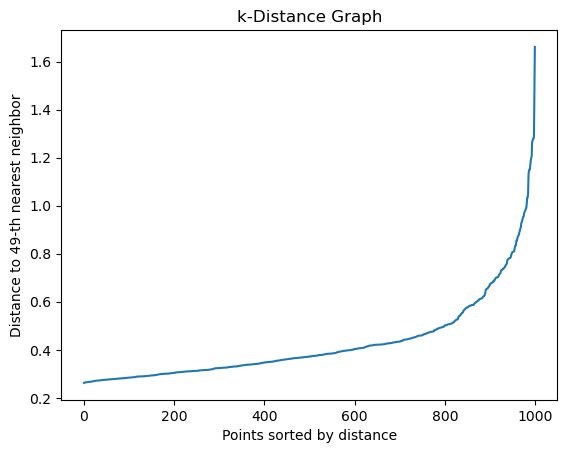

In [33]:
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
# Calcular distâncias para k-vizinhos mais próximos
k = 49  # Normalmente min_samples - 1 -> usamos min_samples = 50
nbrs = NearestNeighbors(n_neighbors=k).fit(X)
distances, indices = nbrs.kneighbors(X)

# Ordenar e plotar as distâncias
distances = np.sort(distances[:, k-1], axis=0)
plt.plot(distances)
plt.xlabel('Points sorted by distance')
plt.ylabel('Distance to {}-th nearest neighbor'.format(k))
plt.title('k-Distance Graph')
plt.show()

In [34]:
from sklearn.metrics import silhouette_score

labels = dbscan.labels_
if len(set(labels)) > 1:  # Verificar se há mais de um cluster
    score = silhouette_score(X, labels)
    print("Silhouette Score:", score)

Silhouette Score: 0.3604989320144276


In [35]:
dbscan = DBSCAN(eps=0.5, min_samples=50)
dbscan.fit(X)

DBSCAN(min_samples=50)

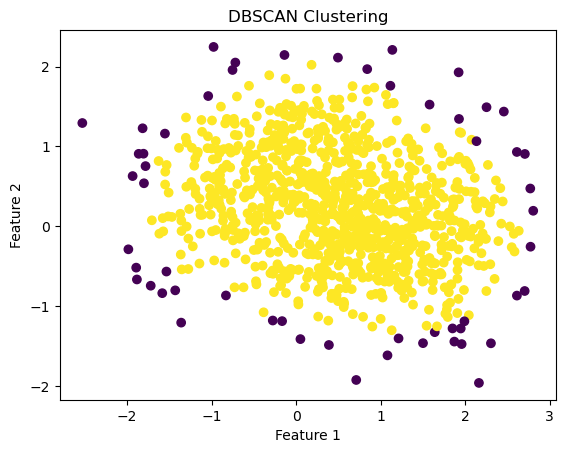

In [36]:
# Visualizar os clusters
plt.scatter(X[:, 0], X[:, 1], c=dbscan.labels_, cmap='viridis')
plt.title('DBSCAN Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()